<a href="https://colab.research.google.com/github/Bigfredoh/Machine-Learning/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
wine_df = pd.read_csv('winequality-red.csv')

In [ ]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
wine_df.columns = ['MixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar',
       'Chlorides', 'FreeSulfurdioxide', 'TotalSulfurdioxide', 'Density',
       'pH', 'Sulphates', 'Alcohol', 'Quality']

In [ ]:
wine_df.head()

,MixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurdioxide,TotalSulfurdioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_df.Quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: Quality, dtype: int64

There are three classification of wine quality observed from the dataset. They are:

3,4 ==> Bad Quality wine(0), 
5,6 ==> Medium Quality wine(1), 
7,8==> Good Quality wine(2)

In [ ]:
wine_df.replace({'Quality':{3:0, 4:0, 5:1, 6:1, 7:2,8:2}}, inplace = True)

In [ ]:
wine_df.head()

,MixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurdioxide,TotalSulfurdioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


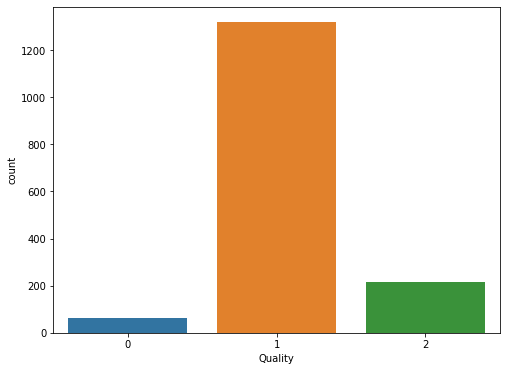

In [ ]:
plt.rcParams["figure.figsize"] = [8, 6]
sns.countplot(data = wine_df, x= 'Quality')
plt.show()

In [ ]:
print(wine_df.corr())

                    MixedAcidity  VolatileAcidity  ...   Alcohol   Quality
MixedAcidity            1.000000        -0.256131  ... -0.061668  0.125886
VolatileAcidity        -0.256131         1.000000  ... -0.202288 -0.333816
CitricAcid              0.671703        -0.552496  ...  0.109903  0.228930
ResidualSugar           0.114777         0.001918  ...  0.042075  0.030153
Chlorides               0.093705         0.061298  ... -0.221141 -0.098829
FreeSulfurdioxide      -0.153794        -0.010504  ... -0.069408 -0.025075
TotalSulfurdioxide     -0.113181         0.076470  ... -0.205654 -0.081960
Density                 0.668047         0.022026  ... -0.496180 -0.123566
pH                     -0.682978         0.234937  ...  0.205633 -0.093946
Sulphates               0.183006        -0.260987  ...  0.093595  0.205409
Alcohol                -0.061668        -0.202288  ...  1.000000  0.361363
Quality                 0.125886        -0.333816  ...  0.361363  1.000000

[12 rows x 12 columns]


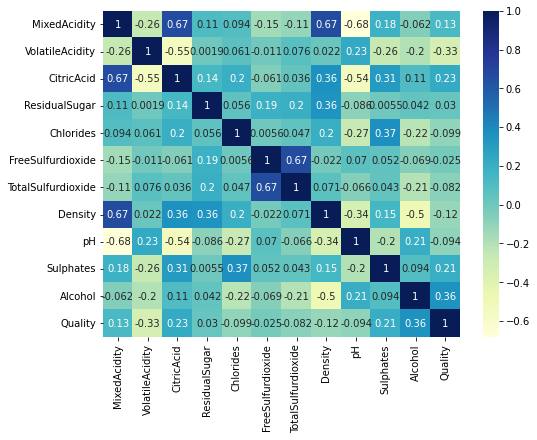

In [ ]:
dataplot = sns.heatmap(wine_df.corr(), cmap="YlGnBu", annot=True)

In [ ]:
X=wine_df.iloc[:, :-1].values
y= wine_df.iloc[:, -1].values

In [ ]:
print(y)

[1 1 1 ... 1 1 1]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size= 0.25, random_state= 1)

In [171]:
X_train.shape

(1199, 11)

In [172]:
y_train.shape

(400, 11)

In [168]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)


In [170]:
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
y_pred=regressor.predict(X_test)